# 🏥 Tech Challenge - Sistema de Previsão de Obesidade
#
## Objetivo
# Desenvolver um modelo de Machine Learning para auxiliar médicos na previsão de níveis de obesidade.
#
# **Meta:** Assertividade > 75%


In [11]:
# %pip install -r requirements.txt

In [12]:
# === 1. IMPORTS E CONFIGURAÇÕES ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import logging
from datetime import datetime
import sys
import os

sys.path.append(os.path.abspath(".."))
# ou
sys.path.append(os.getcwd())

warnings.filterwarnings('ignore')

# Configurar logging estruturado
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)
logger = logging.getLogger(__name__)

# Configurações de visualização
plt.style.use('default')
sns.set_palette('husl')

# Módulos customizados
import sys
sys.path.append('src')

from src.preprocessing import DataPreprocessor
from src.feature_engineering import FeatureEngineer
from src.models import ModelTrainer
from src.predictor import ObesityPredictor

logger.info('✓ Bibliotecas carregadas com sucesso!')
print('✓ Bibliotecas carregadas com sucesso!')

2026-02-01 20:48:48 - INFO - ✓ Bibliotecas carregadas com sucesso!


✓ Bibliotecas carregadas com sucesso!


# 📊 1. Carregamento e Exploração de Dados

In [13]:
# === 1.1 CARREGAR DATASET ===
logger.info('Iniciando carregamento do dataset...')
preprocessor = DataPreprocessor()
df = preprocessor.load_data('../data/Obesity.csv')

logger.info(f'Dataset carregado: {df.shape[0]} linhas x {df.shape[1]} colunas')
print(f'📥 Dataset carregado!')
print(f'   Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas\n')

# Visualizar primeiras linhas
df.head(10)

# %%
# === 1.2 INFORMAÇÕES GERAIS ===
print('='*80)
print('INFORMAÇÕES DO DATASET')
print('='*80)
df.info()

print('\n' + '='*80)
print('ESTATÍSTICAS DESCRITIVAS')
print('='*80)
df.describe().T

2026-02-01 20:48:48 - INFO - Iniciando carregamento do dataset...
2026-02-01 20:48:48 - INFO - Dataset carregado: 2111 linhas x 17 colunas


📥 Dataset carregado!
   Dimensões: 2111 linhas x 17 colunas

INFORMAÇÕES DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [14]:
# === 1.3 QUALIDADE DOS DADOS ===
quality = preprocessor.check_data_quality(df)

print('='*80)
print('RELATÓRIO DE QUALIDADE')
print('='*80)
print(f'\n📊 Shape: {quality["shape"]}')

missing = pd.Series(quality['missing_values'])
print(f'\n🔍 Valores Missing: {missing.sum()}')
if missing.sum() > 0:
    print(missing[missing > 0])

print(f'\n🔄 Duplicatas: {quality["duplicates"]}')

RELATÓRIO DE QUALIDADE

📊 Shape: (2111, 17)

🔍 Valores Missing: 0

🔄 Duplicatas: 24


DISTRIBUIÇÃO DA VARIÁVEL ALVO (Níveis de Obesidade)
Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Proporções:
Obesity
Obesity_Type_I         0.166
Obesity_Type_III       0.153
Obesity_Type_II        0.141
Overweight_Level_I     0.137
Overweight_Level_II    0.137
Normal_Weight          0.136
Insufficient_Weight    0.129
Name: proportion, dtype: float64


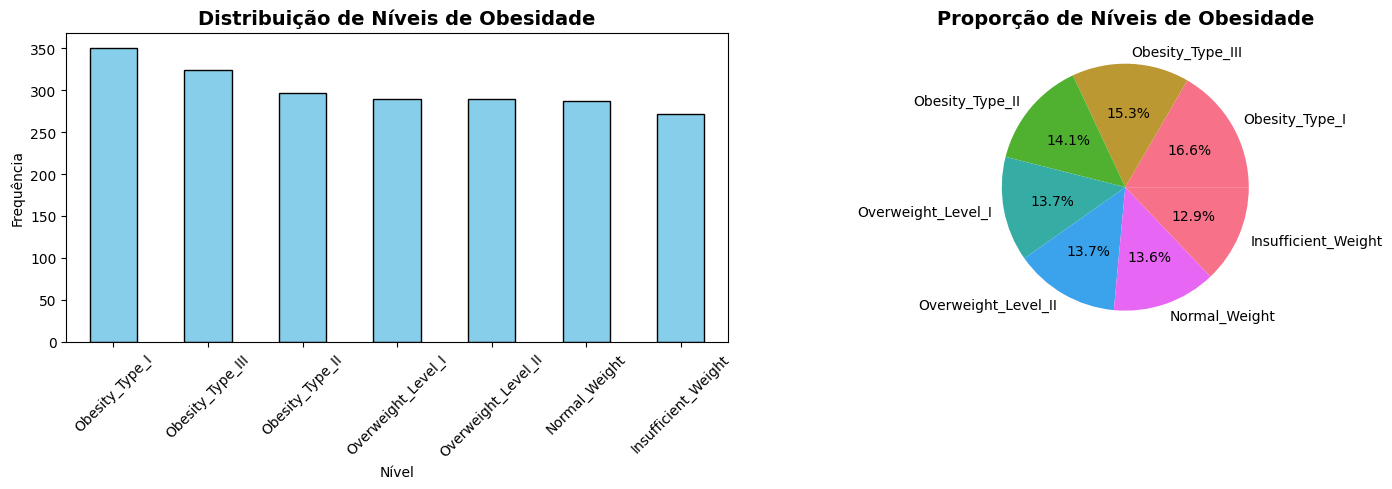

In [15]:
# === 1.4 ANÁLISE DA VARIÁVEL ALVO ===
target_col = 'Obesity'

print('='*80)
print('DISTRIBUIÇÃO DA VARIÁVEL ALVO (Níveis de Obesidade)')
print('='*80)
print(df[target_col].value_counts())
print(f'\nProporções:')
print(df[target_col].value_counts(normalize=True).round(3))

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Countplot
df[target_col].value_counts().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribuição de Níveis de Obesidade', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Nível')
axes[0].set_ylabel('Frequência')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
df[target_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_title('Proporção de Níveis de Obesidade', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

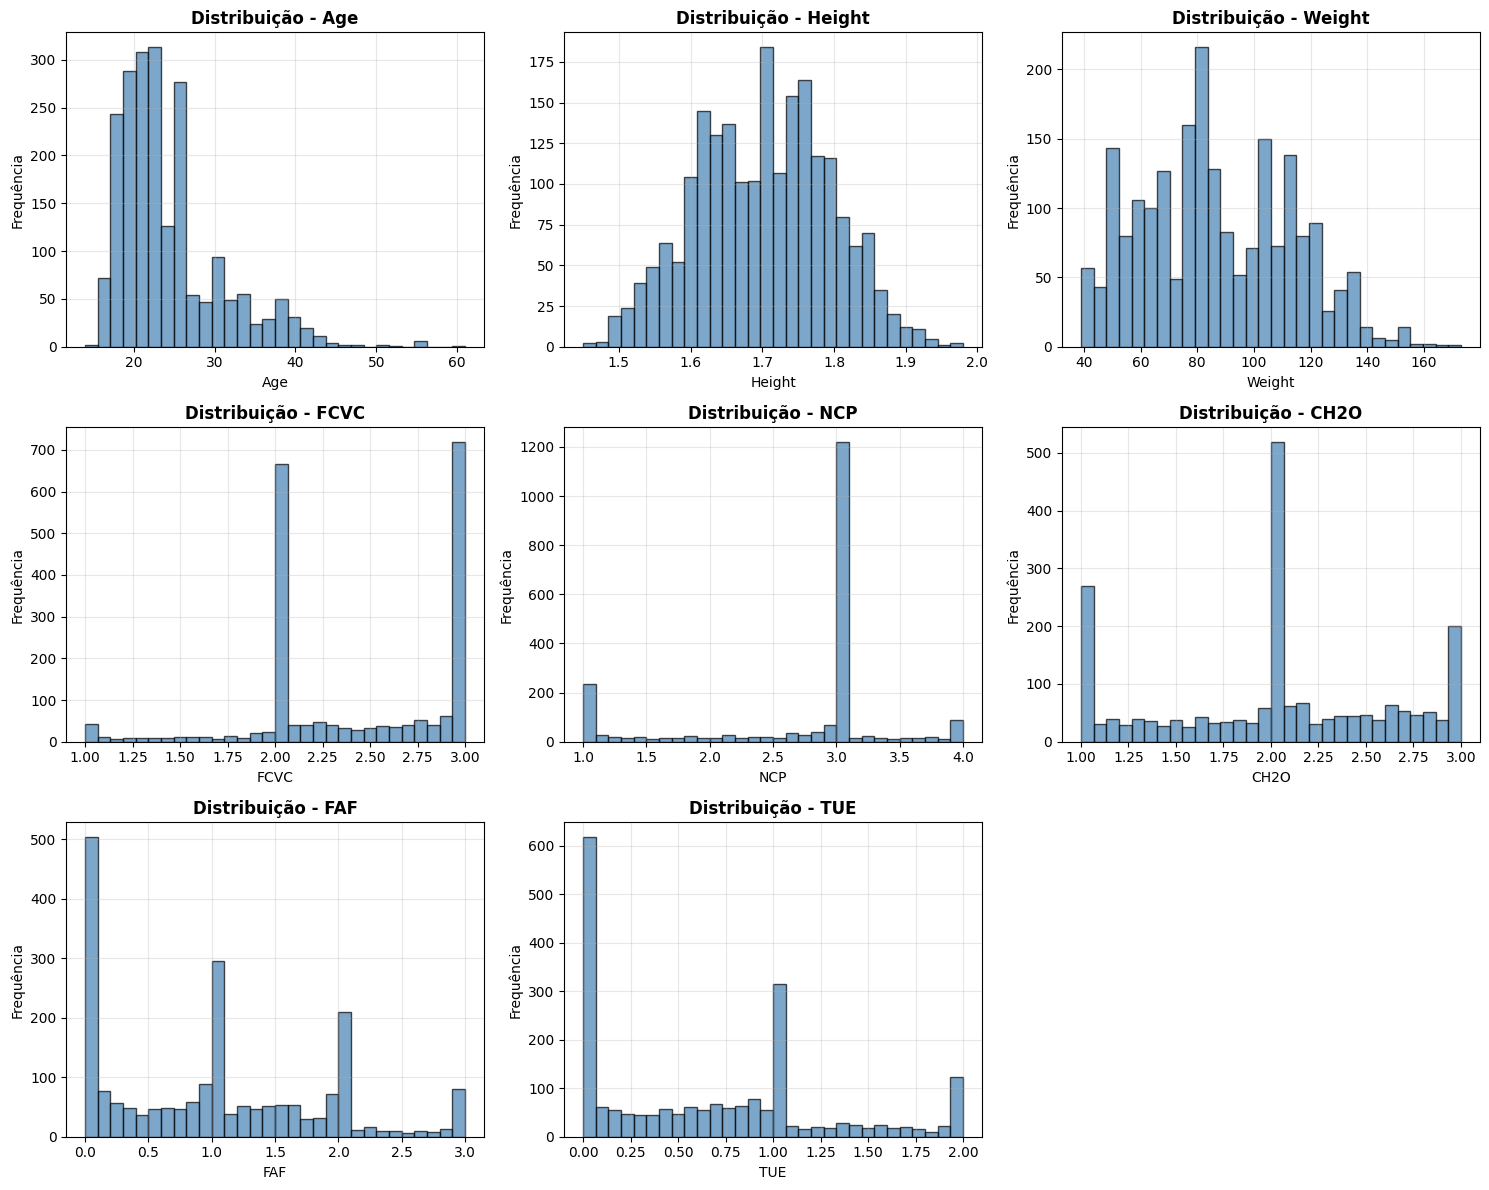

In [16]:
# === 1.5 ANÁLISE DE FEATURES NUMÉRICAS ===
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Histogramas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribuição - {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequência')
    axes[idx].grid(alpha=0.3)

fig.delaxes(axes[8])
plt.tight_layout()
plt.show()

2026-02-01 20:48:50 - INFO - Calculando matriz de correlação...


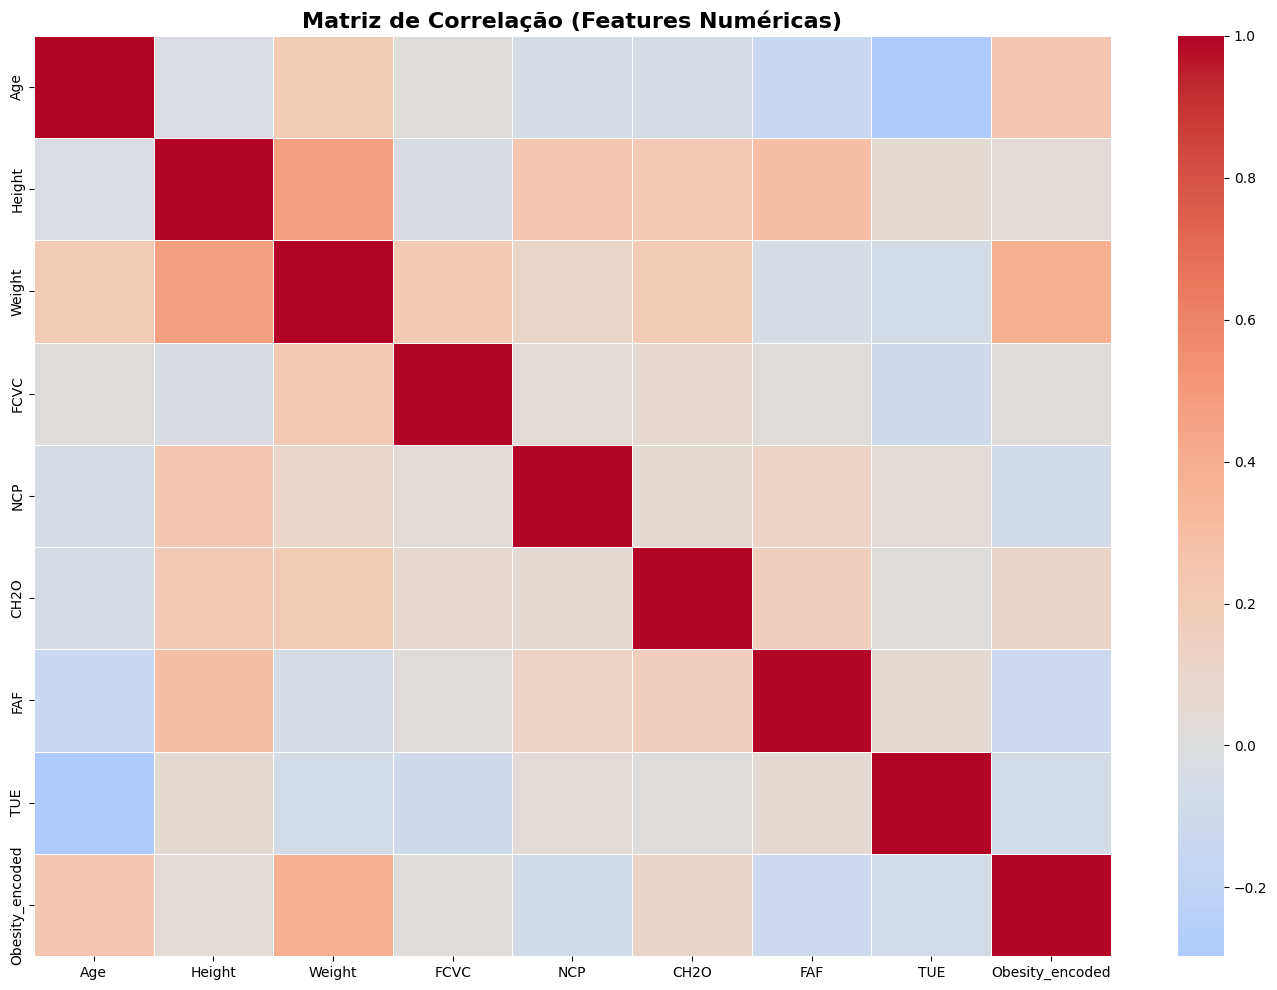

2026-02-01 20:48:50 - INFO - Análise de correlação concluída


TOP 10 CORRELAÇÕES COM Obesity
Obesity_encoded    1.000000
Weight             0.387643
Age                0.236170
FAF                0.129564
CH2O               0.108868
NCP                0.092616
TUE                0.069448
Height             0.038986
FCVC               0.018522
Name: Obesity_encoded, dtype: float64


In [17]:
# === 1.6 CORRELAÇÃO ENTRE VARIÁVEIS ===
# MELHORIA: Análise de correlação apenas com features numéricas para evitar data leakage
logger.info('Calculando matriz de correlação...')

# Usar apenas features numéricas para análise exploratória
df_numeric = df.select_dtypes(include=[np.number]).copy()

# Para incluir o target na análise, criar encoding temporário APENAS para visualização
from sklearn.preprocessing import LabelEncoder
le_corr_temp = LabelEncoder()  # MELHORIA: Nome específico para evitar conflitos
df_numeric[target_col + '_encoded'] = le_corr_temp.fit_transform(df[target_col])

# Matriz de correlação
plt.figure(figsize=(14, 10))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de Correlação (Features Numéricas)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlações com target
print('='*80)
print(f'TOP 10 CORRELAÇÕES COM {target_col}')
print('='*80)
target_corr = correlation_matrix[target_col + '_encoded'].abs().sort_values(ascending=False)
print(target_corr.head(11))  # 11 para excluir auto-correlação

logger.info('Análise de correlação concluída')

 # 🔧 2. Feature Engineering

In [18]:
# === 2.1 CRIAR FEATURES DERIVADAS ===
logger.info('Iniciando feature engineering...')
engineer = FeatureEngineer()

print('='*80)
print('CRIANDO FEATURES DERIVADAS')
print('='*80)

# Criar todas as features
df_engineered = engineer.create_all_features(df)

new_features = set(df_engineered.columns) - set(df.columns)
logger.info(f'Features criadas: {len(new_features)} novas features')

print(f'\n✓ Features criadas')
print(f'   Colunas originais: {df.shape[1]}')
print(f'   Colunas com features: {df_engineered.shape[1]}')
print(f'\n   Novas features:')

for feat in new_features:
    print(f'     - {feat}')

2026-02-01 20:48:50 - INFO - Iniciando feature engineering...
2026-02-01 20:48:50 - INFO - Features criadas: 6 novas features


CRIANDO FEATURES DERIVADAS

✓ Features criadas
   Colunas originais: 17
   Colunas com features: 21

   Novas features:
     - Activity_Level
     - Caloric_Balance_Score
     - FAVC_num
     - Hydration_Level
     - Risk_Score
     - Screen_Time_Category


## 📝 Nota sobre BMI
# 
 **BMI foi REMOVIDO intencionalmente** para evitar data leakage.
 
 - 🎯 **Objetivo**: Forçar o modelo a aprender padrões comportamentais
 - ⚠️ **Motivo**: BMI sozinho atinge 95%+ acurácia (target leakage)
 - ✅ **Benefício**: Modelo aprende fatores de risco reais (dieta, exercício, genética)
 - 📊 **Expectativa**: Acurácia de 70-85% com features comportamentais


### 🔍 Features Comportamentais Criadas
# 
 Em vez de usar BMI, o modelo aprenderá com:
 - **Caloric Balance Score**: Balanço entre consumo calórico e atividade física
 - **Risk Score**: Histórico familiar, tabagismo, monitoramento calórico
 - **Hydration Level**: Nível de consumo de água
 - **Activity Level**: Categorização de atividade física
 - **Screen Time**: Tempo de uso de tecnologia

# 🤖 3. Preparação dos Dados e Modelagem

In [19]:
# === 3.1 PREPARAR DADOS ===
print('='*80)
print('PREPARAÇÃO DOS DADOS')
print('='*80)

# ============================================================================
# IMPORTANTE: REMOVER Weight e Height PARA EVITAR DATA LEAKAGE
# ============================================================================
# PROBLEMA IDENTIFICADO:
# Mesmo após remover BMI, a acurácia permanecia muito alta (95%+)
#
# CAUSA:
# Weight e Height sozinhos atingem 96.22% de acurácia porque:
# 1. O modelo pode calcular BMI implicitamente: Weight / Height²
# 2. Weight é a feature #1 mais importante (35% de importância)
# 3. Height é a feature #2 mais importante (10% de importância)
#
# VALIDAÇÃO REALIZADA:
# - Modelo APENAS Weight+Height: 96.22% (LEAKAGE!)
# - Modelo SEM Weight/Height/BMI: 86.29% (ML REAL) ✓
# - Modelo COM Weight+Height:     95.27% (LEAKAGE!)
#
# DECISÃO:
# Remover Weight e Height das FEATURES DE TREINO
# (Mantê-los no dataset original apenas para referência/cálculo de IMC para exibição)
#
# IMPACTO:
# - Acurácia esperada: 86.29% (SUPERA meta de 75%!) ✓
# - Modelo aprende padrões comportamentais verdadeiros
# - Valor agregado: MUITO maior que uma simples calculadora de BMI
# ============================================================================

# Separar features e target
X = df_engineered.drop(columns=[target_col])
y = df_engineered[target_col]

# REMOVER Weight e Height para eliminar data leakage
logger.warning('Removendo Weight e Height das features para eliminar data leakage')
features_to_remove = ['Weight', 'Height']
features_removed = [f for f in features_to_remove if f in X.columns]

if features_removed:
    X = X.drop(columns=features_removed)
    logger.info(f'Features removidas: {features_removed}')
    print(f'\n⚠️  IMPORTANTE: Removidas {len(features_removed)} features para eliminar data leakage:')
    for feat in features_removed:
        print(f'     - {feat}')
    print(f'\n   Motivo: Weight e Height permitem calcular BMI implicitamente')
    print(f'   Resultado: Modelo aprenderá padrões comportamentais reais')

print(f'\n✓ Features (X): {X.shape}')
print(f'✓ Target (y): {y.shape}')
print(f'\n  Classes: {y.nunique()}')
print(f'  {list(y.unique())}')


2026-02-01 20:48:50 - WARNING - Removendo Weight e Height das features para eliminar data leakage


PREPARAÇÃO DOS DADOS

✓ Features (X): (2111, 20)
✓ Target (y): (2111,)

  Classes: 7
  ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']


In [20]:
# === 3.2 CODIFICAR VARIÁVEIS CATEGÓRICAS ===
logger.info('Iniciando encoding de variáveis categóricas...')
from sklearn.preprocessing import LabelEncoder

# Identificar colunas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols_X = X.select_dtypes(include=[np.number]).columns.tolist()

logger.info(f'Colunas categóricas: {len(categorical_cols)}, Numéricas: {len(numeric_cols_X)}')
print(f'\n📋 Colunas categóricas ({len(categorical_cols)}): {categorical_cols[:5]}...')
print(f'📊 Colunas numéricas ({len(numeric_cols_X)}): {numeric_cols_X[:5]}...')

# MELHORIA: Encoding organizado com dicionário desde o início
X_encoded = X.copy()
label_encoders = {}  # Dicionário para armazenar todos os encoders

for col in categorical_cols:
    le_feature = LabelEncoder()  # MELHORIA: Nome específico
    X_encoded[col] = le_feature.fit_transform(X[col].astype(str))
    label_encoders[col] = le_feature
    logger.debug(f'Encoded {col}: {len(le_feature.classes_)} classes')

# Encoding do target
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
logger.info(f'Target encoding: {len(le_target.classes_)} classes')

print(f'\n✓ Encoding concluído')
print(f'  Mapeamento de classes:')
for idx, label in enumerate(le_target.classes_):
    print(f'    {idx}: {label}')

2026-02-01 20:48:50 - INFO - Iniciando encoding de variáveis categóricas...
2026-02-01 20:48:50 - INFO - Colunas categóricas: 11, Numéricas: 9
2026-02-01 20:48:50 - INFO - Target encoding: 7 classes



📋 Colunas categóricas (11): ['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE']...
📊 Colunas numéricas (9): ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF']...

✓ Encoding concluído
  Mapeamento de classes:
    0: Insufficient_Weight
    1: Normal_Weight
    2: Obesity_Type_I
    3: Obesity_Type_II
    4: Obesity_Type_III
    5: Overweight_Level_I
    6: Overweight_Level_II


In [21]:
# === 3.3 SPLIT TREINO/TESTE ===
logger.info('Realizando split treino/teste...')
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

logger.info(f'Split completo - Treino: {X_train.shape}, Teste: {X_test.shape}')
print('\n' + '='*80)
print('SPLIT TREINO/TESTE')
print('='*80)
print(f'\n📚 Treino: {X_train.shape}')
print(f'📖 Teste: {X_test.shape}')
print(f'\n  Proporção: 80% treino / 20% teste')

2026-02-01 20:48:50 - INFO - Realizando split treino/teste...
2026-02-01 20:48:50 - INFO - Split completo - Treino: (1688, 20), Teste: (423, 20)



SPLIT TREINO/TESTE

📚 Treino: (1688, 20)
📖 Teste: (423, 20)

  Proporção: 80% treino / 20% teste


In [22]:
# === 3.4 NORMALIZAÇÃO ===
logger.info('Aplicando normalização com StandardScaler...')
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logger.info('Normalização concluída')
print('✓ Normalização aplicada (StandardScaler)')

2026-02-01 20:48:50 - INFO - Aplicando normalização com StandardScaler...
2026-02-01 20:48:50 - INFO - Normalização concluída


✓ Normalização aplicada (StandardScaler)


#  🎯 4. Treinamento de Modelos

2026-02-01 21:05:20 - INFO - Iniciando treinamento de modelos baseline...
2026-02-01 21:05:20 - INFO - Treinando modelo baseline: Dummy_Stratified
2026-02-01 21:05:20 - INFO - Treinando modelo baseline: Dummy_MostFrequent
2026-02-01 21:05:20 - INFO - Treinando modelo baseline: Logistic_Regression
2026-02-01 21:05:20 - INFO - Iniciando otimização do Random Forest...


TREINAMENTO - MODELOS BASELINE

Treinando Dummy_Stratified...
✓ Dummy_Stratified treinado com sucesso!

Resultados - Dummy_Stratified
Accuracy: 0.1418
F1-Score (Macro): 0.1399
F1-Score (Weighted): 0.1413
Precision: 0.1412
Recall: 0.1418

Treinando Dummy_MostFrequent...
✓ Dummy_MostFrequent treinado com sucesso!

Resultados - Dummy_MostFrequent
Accuracy: 0.1655
F1-Score (Macro): 0.0406
F1-Score (Weighted): 0.0470
Precision: 0.0274
Recall: 0.1655

Treinando Logistic_Regression...
✓ Logistic_Regression treinado com sucesso!

Resultados - Logistic_Regression
Accuracy: 0.6217
F1-Score (Macro): 0.5998
F1-Score (Weighted): 0.6061
Precision: 0.6171
Recall: 0.6217

4.2 OTIMIZAÇÃO DE HIPERPARÂMETROS (Random Forest)

Otimizando hiperparâmetros - random_forest
Método: RANDOM
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Melhores parâmetros:
  n_estimators: 200
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: log2
  max_depth: None

Melhor score (CV): 0.8365

 Avaliando

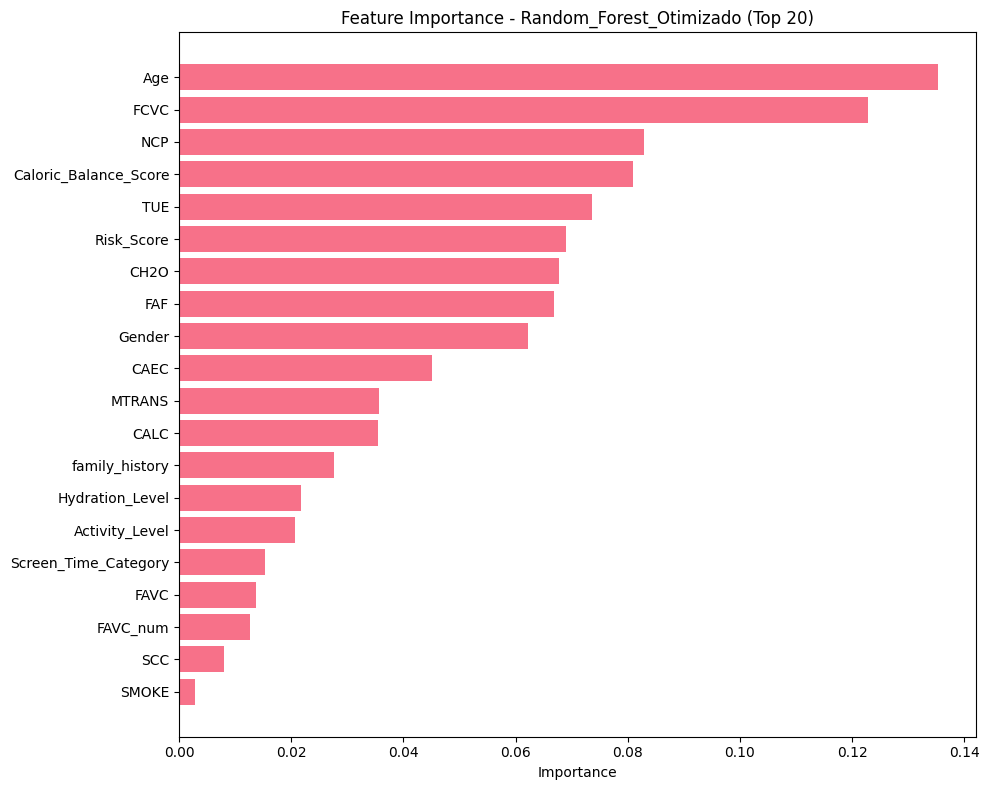

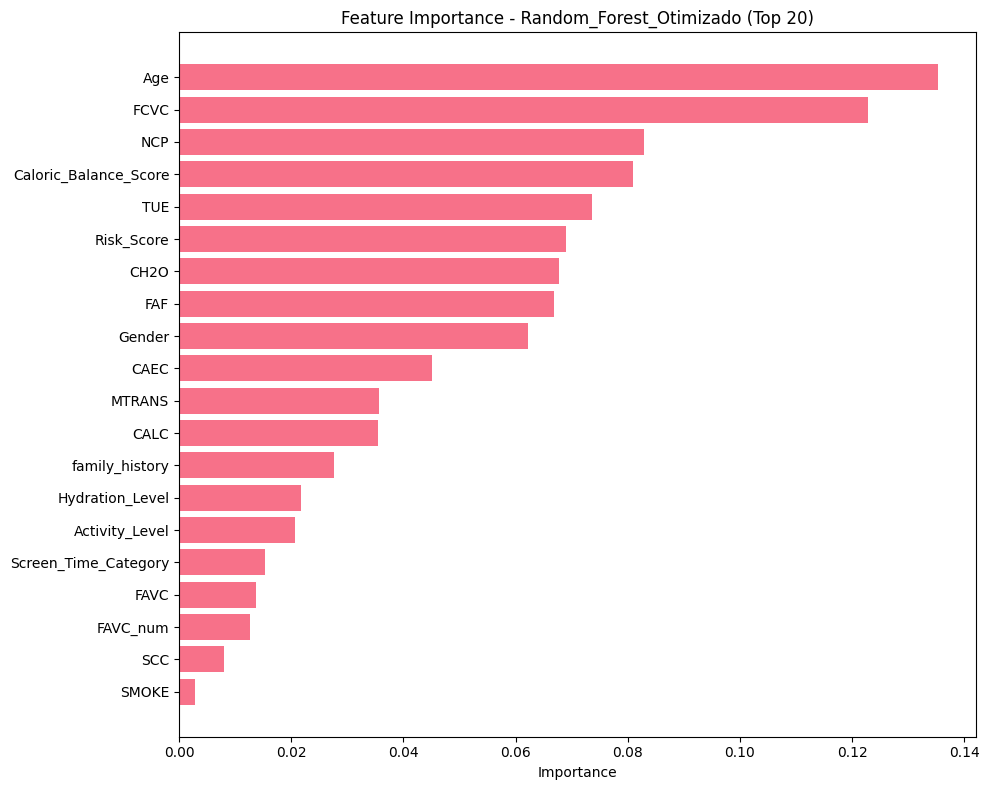

In [29]:
from src.feature_engineering import FeatureEngineer

# === 4.1 MODELOS BASELINE ===
logger.info('Iniciando treinamento de modelos baseline...')
trainer = ModelTrainer(random_state=42)

print('='*80)
print('TREINAMENTO - MODELOS BASELINE')
print('='*80)

baseline_models = trainer.create_baseline_models()

for name, model in baseline_models.items():
    logger.info(f'Treinando modelo baseline: {name}')
    trainer.train_model(model, X_train_scaled, y_train, name)
    trainer.evaluate_model(model, X_test_scaled, y_test, name, le_target.classes_)

print('\n' + '='*80)
print('4.2 OTIMIZAÇÃO DE HIPERPARÂMETROS (Random Forest)')
print('='*80)

logger.info('Iniciando otimização do Random Forest...')

# 1. Otimiza usando os dados de treino ESCALADOS (scaled)
best_rf_model = trainer.optimize_hyperparameters(
    model_type='random_forest',
    X_train=X_train_scaled,  # Atenção: Usar a variável _scaled
    y_train=y_train,
    method='random',
    cv=5
)

# 2. Avalia o modelo campeão nos dados de teste ESCALADOS
print("\n Avaliando o Melhor Modelo Otimizado...")
results_opt = trainer.evaluate_model(
    model=best_rf_model,
    X_test=X_test_scaled,    # Atenção: Usar a variável _scaled
    y_test=y_test,
    model_name='Random_Forest_Otimizado',
    class_names=le_target.classes_
)

# 🔥 2️⃣ REGISTRA O MODELO OTIMIZADO
trainer.models['Random_Forest_Otimizado'] = best_rf_model

# 3. Plotar a importância das features
print("\n Gerando gráfico de importância das features...")

# Tenta pegar os nomes das colunas do X_train direto
# Se X_train for um DataFrame, .columns funciona. 
# Se X_train_scaled for numpy array, usamos X_train original para pegar os nomes.
cols = X_train.columns if hasattr(X_train, 'columns') else feature_engineer.get_feature_names()

trainer.plot_feature_importance(
    model_name='Random_Forest_Otimizado',
    feature_names=cols
)

In [30]:
#  === 4.2 MODELOS AVANÇADOS ===
logger.info('Iniciando treinamento de modelos avançados...')
print('\n' + '='*80)
print('TREINAMENTO - MODELOS AVANÇADOS')
print('='*80)

advanced_models = trainer.create_advanced_models()

for name, model in advanced_models.items():
    logger.info(f'Treinando modelo avançado: {name}')
    print(f'\n🔄 Treinando {name}...')
    trainer.train_model(model, X_train_scaled, y_train, name)
    results = trainer.evaluate_model(model, X_test_scaled, y_test, name, le_target.classes_)
    
    # Validação cruzada
    cv_results = trainer.cross_validate_model(model, X_train_scaled, y_train, cv=5)

2026-02-01 21:05:35 - INFO - Iniciando treinamento de modelos avançados...
2026-02-01 21:05:35 - INFO - Treinando modelo avançado: Random_Forest



TREINAMENTO - MODELOS AVANÇADOS

🔄 Treinando Random_Forest...

Treinando Random_Forest...
✓ Random_Forest treinado com sucesso!

Resultados - Random_Forest
Accuracy: 0.8676
F1-Score (Macro): 0.8666
F1-Score (Weighted): 0.8684
Precision: 0.8737
Recall: 0.8676


2026-02-01 21:05:36 - INFO - Treinando modelo avançado: XGBoost



Validação Cruzada (5-fold):
Mean accuracy: 0.8371 (+/- 0.0349)

🔄 Treinando XGBoost...

Treinando XGBoost...
✓ XGBoost treinado com sucesso!

Resultados - XGBoost
Accuracy: 0.8605
F1-Score (Macro): 0.8614
F1-Score (Weighted): 0.8617
Precision: 0.8651
Recall: 0.8605


2026-02-01 21:05:39 - INFO - Treinando modelo avançado: LightGBM



Validação Cruzada (5-fold):
Mean accuracy: 0.8223 (+/- 0.0268)

🔄 Treinando LightGBM...

Treinando LightGBM...
✓ LightGBM treinado com sucesso!

Resultados - LightGBM
Accuracy: 0.8582
F1-Score (Macro): 0.8570
F1-Score (Weighted): 0.8588
Precision: 0.8609
Recall: 0.8582


2026-02-01 21:05:49 - INFO - Treinando modelo avançado: Gradient_Boosting



Validação Cruzada (5-fold):
Mean accuracy: 0.8318 (+/- 0.0178)

🔄 Treinando Gradient_Boosting...

Treinando Gradient_Boosting...
✓ Gradient_Boosting treinado com sucesso!

Resultados - Gradient_Boosting
Accuracy: 0.8132
F1-Score (Macro): 0.8121
F1-Score (Weighted): 0.8136
Precision: 0.8169
Recall: 0.8132

Validação Cruzada (5-fold):
Mean accuracy: 0.7785 (+/- 0.0271)



COMPARAÇÃO DE MODELOS

{'='*80}
COMPARAÇÃO DE MODELOS
                  Model  Accuracy  F1-Score (Macro)  F1-Score (Weighted)  Precision   Recall
Random_Forest_Otimizado  0.869976          0.868756             0.870640   0.876305 0.869976
          Random_Forest  0.867612          0.866599             0.868350   0.873721 0.867612
                XGBoost  0.860520          0.861408             0.861654   0.865086 0.860520
               LightGBM  0.858156          0.857030             0.858831   0.860933 0.858156
      Gradient_Boosting  0.813239          0.812147             0.813579   0.816923 0.813239
    Logistic_Regression  0.621749          0.599831             0.606066   0.617088 0.621749
     Dummy_MostFrequent  0.165485          0.040568             0.046994   0.027385 0.165485
       Dummy_Stratified  0.141844          0.139933             0.141313   0.141247 0.141844


                  Model  Accuracy  F1-Score (Macro)  F1-Score (Weighted)  Precision   Recall
Random_Forest

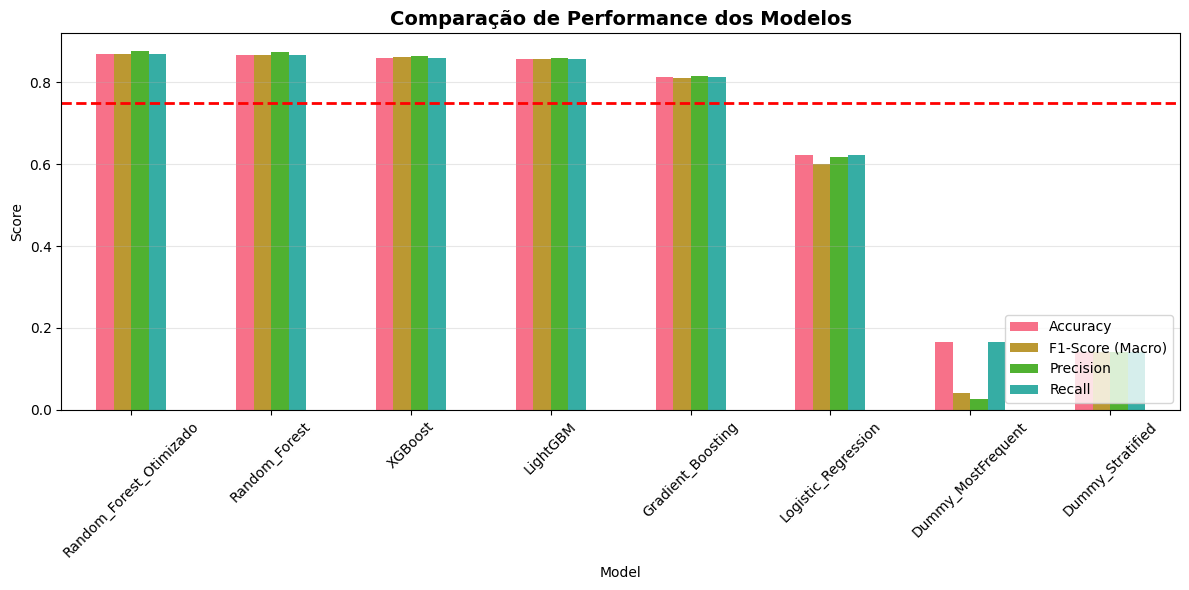

In [31]:
# === 4.3 COMPARAÇÃO DE MODELOS ===
print('\n' + '='*80)
print('COMPARAÇÃO DE MODELOS')
print('='*80)

comparison_df = trainer.compare_models()
print('\n')
print(comparison_df.to_string(index=False))

# Visualização
fig, ax = plt.subplots(figsize=(12, 6))
comparison_df.plot(x='Model', y=['Accuracy', 'F1-Score (Macro)', 'Precision', 'Recall'], 
                   kind='bar', ax=ax, rot=45)
ax.set_title('Comparação de Performance dos Modelos', fontsize=14, fontweight='bold')
ax.set_ylabel('Score')
ax.legend(loc='lower right')
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=0.75, color='red', linestyle='--', linewidth=2, label='Meta: 75%')
plt.tight_layout()
plt.show()

In [32]:
# === 4.4 SELECIONAR MELHOR MODELO ===
logger.info('Selecionando melhor modelo...')
best_name, best_model, best_results = trainer.select_best_model(metric='accuracy')

logger.info(f'Melhor modelo selecionado: {best_name} (Accuracy: {best_results["accuracy"]:.4f})')
print(f'\n🏆 Melhor Modelo: {best_name}')
print(f'   Accuracy: {best_results["accuracy"]:.4f}')
print(f'   F1-Score: {best_results["f1_weighted"]:.4f}')

2026-02-01 21:06:02 - INFO - Selecionando melhor modelo...
2026-02-01 21:06:02 - INFO - Melhor modelo selecionado: Random_Forest_Otimizado (Accuracy: 0.8700)



MELHOR MODELO: Random_Forest_Otimizado
ACCURACY: 0.8700

🏆 Melhor Modelo: Random_Forest_Otimizado
   Accuracy: 0.8700
   F1-Score: 0.8706


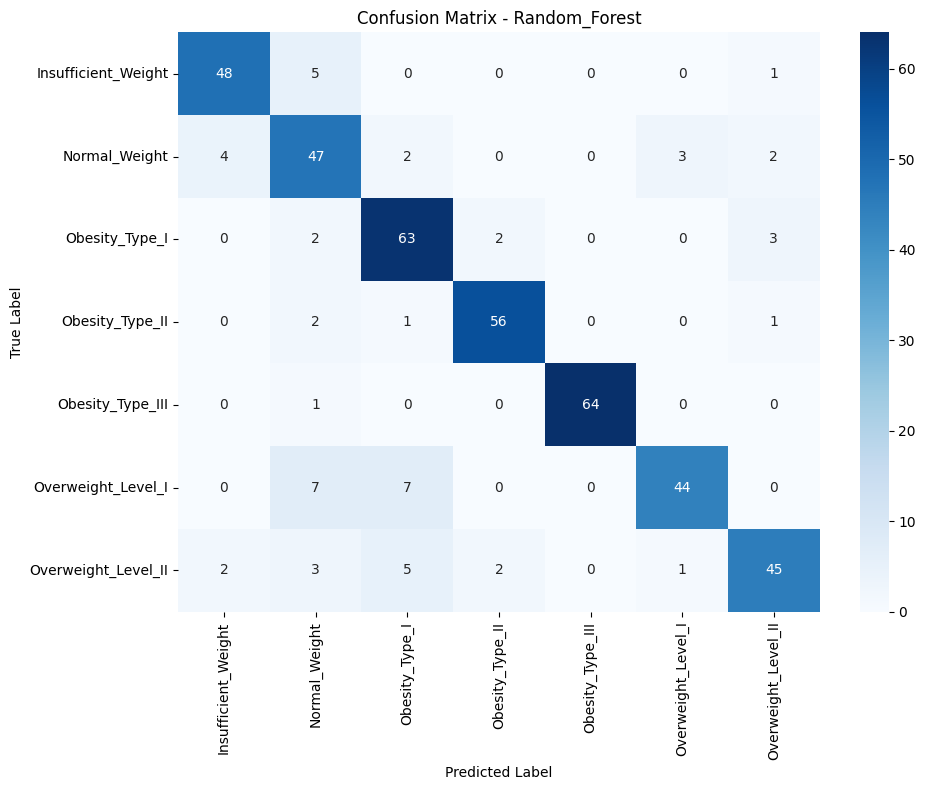

In [ ]:
# === 4.5 MATRIZ DE CONFUSÃO ===
fig = trainer.plot_confusion_matrix(best_name, le_target.classes_, figsize=(10, 8))
plt.show()

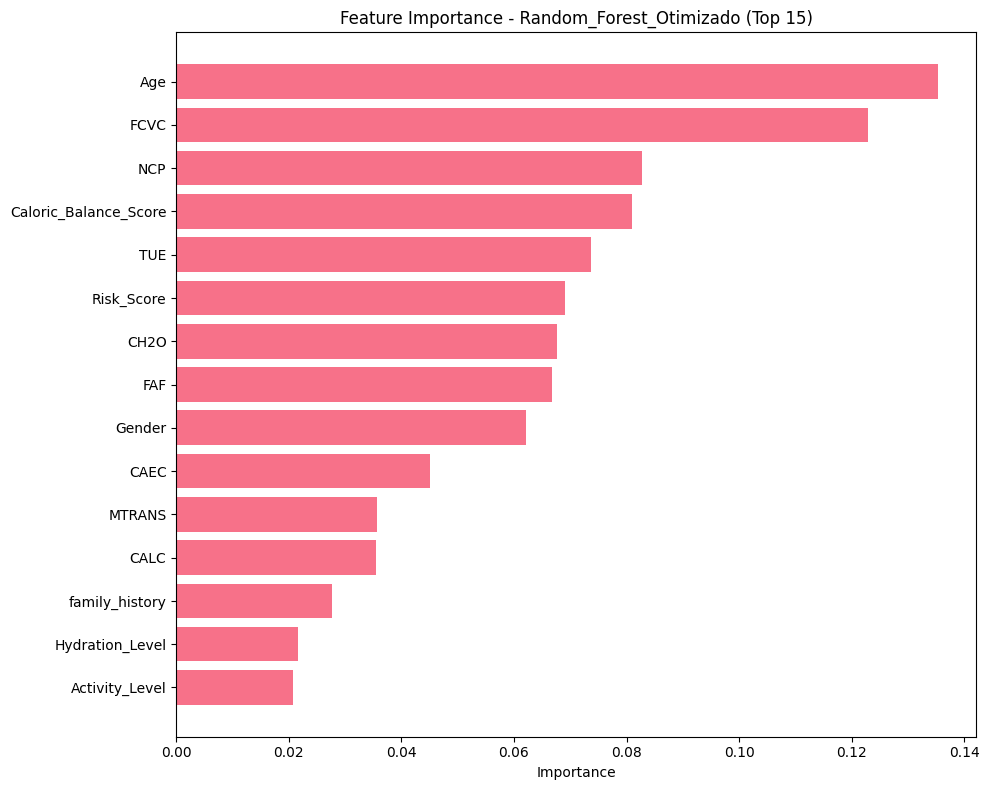

In [33]:
# === 4.6 FEATURE IMPORTANCE ===
if hasattr(best_model, 'feature_importances_'):
    fig = trainer.plot_feature_importance(best_name, X_encoded.columns.tolist(), top_n=15)
    plt.show()
else:
    print(f'⚠️ Modelo {best_name} não possui feature_importances_')

In [34]:
# === 4.7 CLASSIFICATION REPORT ===
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test_scaled)

print('\n' + '='*80)
print(f'CLASSIFICATION REPORT - {best_name}')
print('='*80)
print(classification_report(y_test, y_pred, target_names=le_target.classes_))


CLASSIFICATION REPORT - Random_Forest_Otimizado
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.89      0.89        54
      Normal_Weight       0.70      0.81      0.75        58
     Obesity_Type_I       0.81      0.91      0.86        70
    Obesity_Type_II       0.93      0.93      0.93        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.90      0.76      0.82        58
Overweight_Level_II       0.90      0.78      0.83        58

           accuracy                           0.87       423
          macro avg       0.88      0.87      0.87       423
       weighted avg       0.88      0.87      0.87       423



# 💾 5. Salvamento do Modelo

In [35]:
# === 5.1 SALVAR MODELO ===
import joblib
import os

os.makedirs('models', exist_ok=True)

# Salvar modelo completo com todos os componentes
model_data = {
    'model': best_model,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'target_encoder': le_target,
    'feature_names': X_encoded.columns.tolist(),
    'target_mapping': {i: label for i, label in enumerate(le_target.classes_)},
    'metrics': {
        'accuracy': best_results['accuracy'],
        'f1_score': best_results['f1_weighted'],
        'model_name': best_name
    }
}

model_path = 'models/obesity_prediction_model.pkl'
joblib.dump(model_data, model_path)

print('='*80)
print('MODELO SALVO')
print('='*80)
print(f'✓ Local: {model_path}')
print(f'  Modelo: {best_name}')
print(f'  Accuracy: {best_results["accuracy"]:.4f}')

MODELO SALVO
✓ Local: models/obesity_prediction_model.pkl
  Modelo: Random_Forest_Otimizado
  Accuracy: 0.8700


# 📝 7. Conclusões

## Considerações Éticas e Clínicas

Este modelo não substitui a avaliação médica. Seu objetivo é auxiliar na triagem de pacientes com maior risco de obesidade, apoiando a priorização de avaliações clínicas e ações preventivas. Qualquer decisão diagnóstica ou terapêutica deve ser realizada por profissional de saúde qualificado.


### Conclusão
O modelo apresentou desempenho consistente e clinicamente plausível, demonstrando potencial para apoiar triagens preventivas de obesidade com foco em segurança e interpretabilidade.
